In [1]:
#GlowScript 2.7 VPython
#this prevents accidental user scrolling
#scene.userzoom=False

from vpython import *
#gravitational field vector
g=vector(0,-9.8,0)

#these two lines make the ground 
ground=box(pos=vector(0,-1.5,0), size=vector(10,.2,20), color=color.green)
line=box(pos=vector(0,-1.49,0), size=vector(.1,.2,20), color=color.white)

#the soccer ball
ball=sphere(pos=vector(0,-1.4,9.5), radius=.105, color=color.white, make_trail=True)
#density of soccer ball
rhosoccer=74*1.20 #74 times the density of air
#calculate the mass of the soccer ball
ball.m=(rhosoccer*4*pi*ball.radius**3)/3

#Angular velocity of ball
ball.omega=vector(0,20,0)

ball2=sphere(pos=ball.pos, radius=ball.radius, color=color.yellow, make_trail=True)

#launch speed in m/s
v0=20
#launch angle 
theta = 30*pi/180

#initial velocity vector
ball.v=v0*vector(0.15,sin(theta),-cos(theta))
#initial momentum vector
ball.p=ball.m*ball.v

ball2.p=ball.p
ball2.m=ball.m

rho=1.02 #density of air
C=.47 #the drag coefficient for a sphere

A = pi*ball.radius**2

s=.033 #this is a magnus force constant

t=0
dt=0.0001
y_val = []
time = []
while ball.pos.y>=-1.4 and ball.pos.y<2.6:
    rate(700)
    #calculate the velocity- it makes it easier to calc air drag
    ball.v=ball.p/ball.m
    
   #calculate the force
   #note that to square velocity, must first find magnitude
   #in order to make it a vector, I multiply by unit vector for v
    F=ball.m*g-.5*rho*A*C*norm(ball.v)*mag(ball.v)**2+s*cross(ball.omega,ball.v)
    #F2=ball2.m*g
    #update the momentum
    ball.p=ball.p+F*dt
    #ball2.p=ball2.p+F2*dt
    #update the position
    ball.pos=ball.pos+ball.p*dt/ball.m
    #ball2.pos=ball2.pos+ball2.p*dt/ball2.m
    #update the time
    y_val.append(ball.pos.y)
    t=t+dt
    time.append(t)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Text(0, 0.5, 'y (cm)')

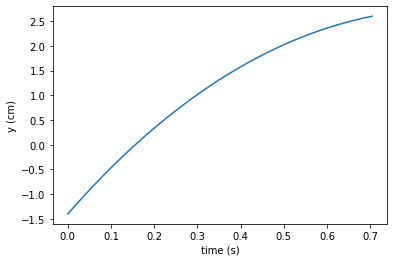

In [2]:
import matplotlib.pyplot as plt
plt.plot(time, y_val)
plt.xlabel("time (s)")
plt.ylabel("y (cm)")